# Testing Enviornment

In [212]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [213]:
%run ../test/test_algorithms.py

........
----------------------------------------------------------------------
Ran 8 tests in 0.141s

OK


In [214]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.048s

OK


In [215]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


In [216]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [14]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [15]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [285]:
%run ../tools/predictorsI.py

In [286]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [287]:
op0.create_bilstm()

In [288]:
op0.model_blueprint()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 25, 100)           20800     
_________________________________________________________________
lstm_32 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [289]:
op0.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 44ms/step - loss: 17.0388 - mean_squared_error: 17.0388 - val_loss: 16.1110 - val_mean_squared_error: 16.1110
Epoch 2/10
20/20 [==============================] - 0s 19ms/step - loss: 1.6438 - mean_squared_error: 1.6438 - val_loss: 0.5050 - val_mean_squared_error: 0.5050
Epoch 3/10
20/20 [==============================] - 0s 19ms/step - loss: 0.1809 - mean_squared_error: 0.1809 - val_loss: 0.2510 - val_mean_squared_error: 0.2510
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.1952 - val_mean_squared_error: 0.1952
Epoch 5/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0985 - mean_squared_error: 0.0985 - val_loss: 0.1532 - val_mean_squared_error: 0.1532
Epoch 6/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1815 - val_mean_squared_error: 0.1815
Epoch 7/10
20/20 [============

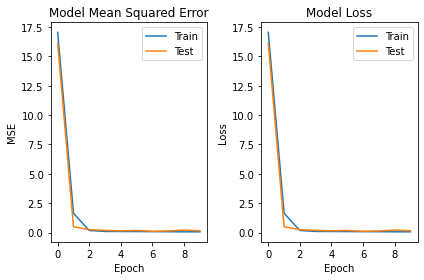

In [290]:
op0.show_performance()

In [291]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [292]:
nice = op0.predict(oyea)
nice

,Bidirectional LSTM
0,7.466393
1,7.250769
2,7.548186
3,7.609942
4,7.256098
5,7.257919
6,7.884319


In [293]:
op1.create_lstm()

In [294]:
op1.model_blueprint()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 25, 40)            6720      
_________________________________________________________________
lstm_34 (LSTM)               (None, 25, 50)            18200     
_________________________________________________________________
lstm_35 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_27 (Dense)             (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [295]:
op1.fit_model(10)

Epoch 1/10
20/20 [==============================] - 1s 53ms/step - loss: 23.0704 - mean_squared_error: 23.0704 - val_loss: 6.8943 - val_mean_squared_error: 6.8943
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 6.4319 - mean_squared_error: 6.4319 - val_loss: 7.8420 - val_mean_squared_error: 7.8420
Epoch 3/10
20/20 [==============================] - 1s 26ms/step - loss: 0.6113 - mean_squared_error: 0.6113 - val_loss: 0.5386 - val_mean_squared_error: 0.5386
Epoch 4/10
20/20 [==============================] - 1s 25ms/step - loss: 0.1379 - mean_squared_error: 0.1379 - val_loss: 0.2084 - val_mean_squared_error: 0.2084
Epoch 5/10
20/20 [==============================] - 1s 26ms/step - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1648 - val_mean_squared_error: 0.1648
Epoch 6/10
20/20 [==============================] - 1s 31ms/step - loss: 0.0825 - mean_squared_error: 0.0825 - val_loss: 0.2143 - val_mean_squared_error: 0.2143
Epoch 7/10
20/20 [==============

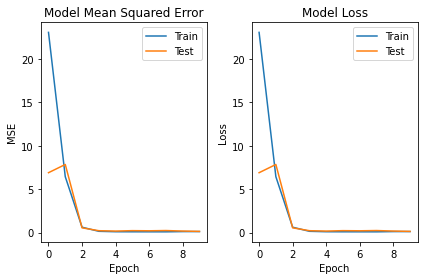

In [296]:
op1.show_performance()

In [297]:
nice = op1.predict(oyea)
nice

,LSTM
0,7.589522
1,7.265796
2,7.592666
3,7.265763
4,7.107807
5,7.429338
6,7.448072


In [298]:
op2.create_cnn()

In [299]:
op2.model_blueprint()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 24, 64)            192       
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 11, 32)            0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 352)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 50)                17650     
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
_________________________________________________

In [300]:
op2.fit_model(10)

Epoch 1/10
20/20 [==============================] - 0s 8ms/step - loss: 12.5570 - mean_squared_error: 12.5570 - val_loss: 7.5322 - val_mean_squared_error: 7.5322
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 1.2861 - mean_squared_error: 1.2861 - val_loss: 0.3582 - val_mean_squared_error: 0.3582
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.1391 - mean_squared_error: 0.1391 - val_loss: 0.2526 - val_mean_squared_error: 0.2526
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.1960 - val_mean_squared_error: 0.1960
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.1750 - val_mean_squared_error: 0.1750
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.2476 - val_mean_squared_error: 0.2476
Epoch 7/10
20/20 [====================

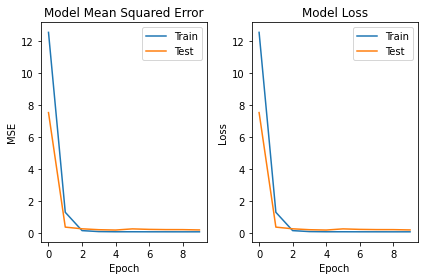

In [301]:
op2.show_performance()

In [302]:
nice = op2.predict(oyea)
nice

,CNN
0,7.493083
1,7.548632
2,7.634683
3,7.547066
4,7.658242
5,7.511546
6,7.618557


In [303]:
op3.create_mlp()

In [304]:
op3.model_blueprint()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 50)                1300      
_________________________________________________________________
dense_31 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_32 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_33 (Dense)             (None, 7)                 182       
Total params: 3,407
Trainable params: 3,407
Non-trainable params: 0
_________________________________________________________________


In [305]:
op3.fit_model(100)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 29.2505 - mean_squared_error: 29.2505 - val_loss: 27.9546 - val_mean_squared_error: 27.9546
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 10.1102 - mean_squared_error: 10.1102 - val_loss: 7.2582 - val_mean_squared_error: 7.2582
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2.3203 - mean_squared_error: 2.3203 - val_loss: 1.8911 - val_mean_squared_error: 1.8911
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5282 - mean_squared_error: 0.5282 - val_loss: 0.4539 - val_mean_squared_error: 0.4539
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1354 - mean_squared_error: 0.1354 - val_loss: 0.2650 - val_mean_squared_error: 0.2650
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 7/100
20/20 [=========

20/20 [==============================] - 0s 2ms/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.1985 - val_mean_squared_error: 0.1985
Epoch 52/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1908 - val_mean_squared_error: 0.1908
Epoch 53/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.1528 - val_mean_squared_error: 0.1528
Epoch 54/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.1670 - val_mean_squared_error: 0.1670
Epoch 55/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0597 - mean_squared_error: 0.0597 - val_loss: 0.1803 - val_mean_squared_error: 0.1803
Epoch 56/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0598 - mean_squared_error: 0.0598 - val_loss: 0.1929 - val_mean_squared_error: 0.1929
Epoch 57/100
20/20 [=====================

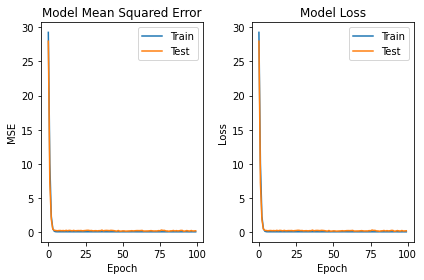

In [306]:
op3.show_performance()

In [307]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [308]:
nice = op3.predict(oyea)
nice

,MLP
0,7.460367
1,7.492427
2,7.539879
3,7.583290
4,7.579746
5,7.621171
6,7.639413


In [375]:
%run ../tools/predictorsII.py

In [376]:
oo = UnivariatePredictorII(prices, 7)

In [368]:
oo.fit_neural_model(100,"D")

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:nprophet.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
INFO:nprophet:learning rate range test found optimal lr: 5.34E-01
Epoch[100/100]: 100%|█| 100/100 [00:04<00:00, 20.25it/s, SmoothL1Loss=0.000657, MAE=0.146, RegLoss=0, MAE_val=0.752, Sm


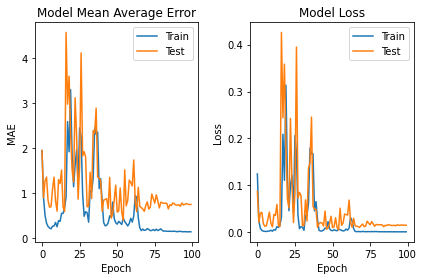

In [369]:
oo.show_performance_neural()

In [370]:
oo.predict_neural()

,Neural Prophet
0,8.588682
1,8.593498
2,7.879306
3,7.912072
4,8.635946
5,8.625532
6,8.664610


In [377]:
oo.fit_prophet_model()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Making 50 forecasts with cutoffs between 2009-08-15 12:00:00 and 2010-02-03 00:00:00


  0%|          | 0/50 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days 00:00:00,0.061154,0.247293,0.202087,0.029285,0.030000,0.583333
1,1 days 12:00:00,0.065897,0.256705,0.198447,0.028946,0.022455,0.607639
2,2 days 00:00:00,0.083575,0.289093,0.234182,0.033957,0.034854,0.483696
3,2 days 12:00:00,0.059378,0.243676,0.180051,0.026026,0.018797,0.720000
4,3 days 12:00:00,0.053277,0.230818,0.185698,0.027001,0.024332,0.640000
5,4 days 12:00:00,0.077778,0.278887,0.225152,0.032715,0.027796,0.541667
6,5 days 00:00:00,0.086568,0.294225,0.229526,0.033036,0.026833,0.605903
7,5 days 12:00:00,0.100804,0.317496,0.257112,0.037308,0.036535,0.483696
8,6 days 00:00:00,0.077016,0.277518,0.209196,0.030107,0.023650,0.680000
9,7 days 00:00:00,0.070612,0.265729,0.215752,0.031163,0.027964,0.600000


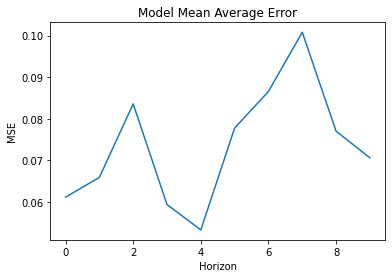

In [372]:
oo.show_performance_prophet()

In [378]:
oo.predict_prophet()

,Prophet
0,7.309689
1,7.288514
2,7.412138
3,7.413944
4,7.306175
5,7.295620
6,7.317085


In [374]:
%run ../tools/predictorsIII.py

In [256]:
len(prices)

279

In [268]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [258]:
op4.create_cnnlstm()

In [259]:
op4.model_blueprint()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_74 (TimeDis (None, None, 11, 64)      192       
_________________________________________________________________
time_distributed_75 (TimeDis (None, None, 10, 32)      4128      
_________________________________________________________________
time_distributed_76 (TimeDis (None, None, 5, 32)       0         
_________________________________________________________________
time_distributed_77 (TimeDis (None, None, 160)         0         
_________________________________________________________________
lstm_25 (LSTM)               (None, None, 50)          42200     
_________________________________________________________________
lstm_26 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_23 (Dense)             (None, 20)              

In [260]:
op4.fit_model(10)

Epoch 1/10
19/19 [==============================] - 1s 28ms/step - loss: 27.4911 - mean_squared_error: 27.4911 - val_loss: 40.5169 - val_mean_squared_error: 40.5169
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 15.2919 - mean_squared_error: 15.2919 - val_loss: 18.3411 - val_mean_squared_error: 18.3411
Epoch 3/10
19/19 [==============================] - 0s 5ms/step - loss: 6.0431 - mean_squared_error: 6.0431 - val_loss: 6.7069 - val_mean_squared_error: 6.7069
Epoch 4/10
19/19 [==============================] - 0s 5ms/step - loss: 1.6419 - mean_squared_error: 1.6419 - val_loss: 0.9629 - val_mean_squared_error: 0.9629
Epoch 5/10
19/19 [==============================] - 0s 5ms/step - loss: 0.2709 - mean_squared_error: 0.2709 - val_loss: 0.5122 - val_mean_squared_error: 0.5122
Epoch 6/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.4927 - val_mean_squared_error: 0.4927
Epoch 7/10
19/19 [=============

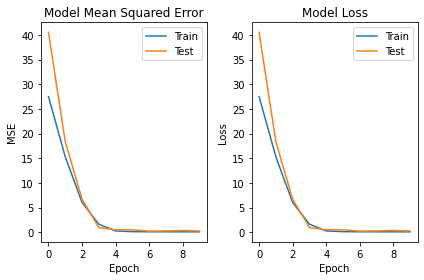

In [261]:
op4.show_performance()

In [262]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [266]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

,CNN-LSTM
0,7.625943
1,7.442990
2,8.041752
3,7.472704
4,7.698625
5,7.770092
6,7.436638
7,8.211632
8,8.182108
9,8.023966


<AxesSubplot:>

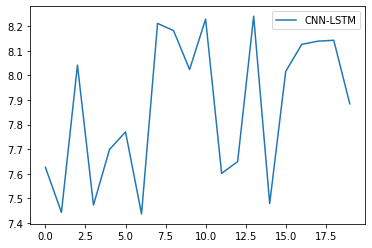

In [267]:
nice.plot()